In [4]:
!pip install xgboost


  Using cached xgboost-3.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.1.1-py3-none-win_amd64.whl (72.0 MB)


In [2]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [3]:
import pandas as pd

# Charger le fichier CSV fourni
file_path = "C:/Users/Trust/Documents/DataBeez/swi_global_12.5km_10daily_v3_cog.csv"

# Essayer de lire le CSV avec différentes options pour un rendu structuré
try:
    # Tentative 1 : Lecture standard
    df = pd.read_csv(file_path)
except Exception as e:
    print("Lecture standard échouée:", e)
    # Tentative 2 : Lecture avec un autre séparateur ou encodage possible
    try:
        df = pd.read_csv(file_path, sep=';', encoding='utf-8')
    except Exception as e2:
        print("Lecture avec séparateur ';' échouée:", e2)
        try:
            df = pd.read_csv(file_path, sep='\t', encoding='utf-8')
        except Exception as e3:
            print("Lecture avec tabulation échouée:", e3)
            df = None

# Si le dataframe est chargé, afficher un aperçu
if df is not None:
    df.head()


In [4]:

# Lecture du fichier Excel
d7 = pd.read_csv("weather_senegal_departements_2017_2022.csv")

# Afficher les premières lignes
#print(d1.head())
d7



,time,temperature_2m_max,temperature_2m_min,precipitation_sum,relative_humidity_2m_max,latitude,longitude,departement
0,2017-01-01,24.2,22.4,0.0,72,14.7167,-17.4677,Dakar
1,2017-01-02,24.0,22.4,0.0,73,14.7167,-17.4677,Dakar
2,2017-01-03,24.4,22.4,0.0,69,14.7167,-17.4677,Dakar
3,2017-01-04,23.9,22.2,0.0,70,14.7167,-17.4677,Dakar
4,2017-01-05,23.4,20.8,0.0,68,14.7167,-17.4677,Dakar
...,...,...,...,...,...,...,...,...
35051,2022-12-27,34.6,18.2,0.0,43,13.9700,-13.3500,Koumpentoum
35052,2022-12-28,31.5,21.9,0.2,41,13.9700,-13.3500,Koumpentoum
35053,2022-12-29,30.0,21.5,0.8,49,13.9700,-13.3500,Koumpentoum
35054,2022-12-30,27.8,18.4,3.2,79,13.9700,-13.3500,Koumpentoum


In [5]:
d7[5000:5001]

,time,temperature_2m_max,temperature_2m_min,precipitation_sum,relative_humidity_2m_max,latitude,longitude,departement
5000,2018-09-11,26.7,25.8,0.0,91,14.75,-17.4,Pikine


In [6]:
print(d7.shape)
print(d7.columns)
print(d7.head())

(35056, 8)
Index(['time', 'temperature_2m_max', 'temperature_2m_min', 'precipitation_sum',
       'relative_humidity_2m_max', 'latitude', 'longitude', 'departement'],
      dtype='object')
         time  temperature_2m_max  temperature_2m_min  precipitation_sum  \
0  2017-01-01                24.2                22.4                0.0   
1  2017-01-02                24.0                22.4                0.0   
2  2017-01-03                24.4                22.4                0.0   
3  2017-01-04                23.9                22.2                0.0   
4  2017-01-05                23.4                20.8                0.0   

   relative_humidity_2m_max  latitude  longitude departement  
0                        72   14.7167   -17.4677       Dakar  
1                        73   14.7167   -17.4677       Dakar  
2                        69   14.7167   -17.4677       Dakar  
3                        70   14.7167   -17.4677       Dakar  
4                        68   14.7167  

In [7]:
print(d7.isnull().values.any())


False


In [8]:
# - Encoder les colonnes catégorielles (départements, mois, etc.)
for col in d7.select_dtypes(include='object').columns:
    d7[col] = LabelEncoder().fit_transform(d7[col])

In [9]:
target = 'precipitation_sum'  # adapte ce nom selon ta colonne
X = d7.drop(columns=[target])
y = d7[target]

In [10]:
# 6️⃣ Séparer les données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# 7️⃣ Entraîner un modèle
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [12]:
# 8️⃣ Évaluer le modèle
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"\nPerformance du modèle :")
print(f"✅ RMSE = {rmse:.3f}")
print(f"✅ R² = {r2:.3f}")


Performance du modèle :
✅ RMSE = 3.439
✅ R² = 0.451


In [13]:


# Sauvegarde du modèle dans un fichier
joblib.dump(model, 'mon_modele')


['mon_modele']

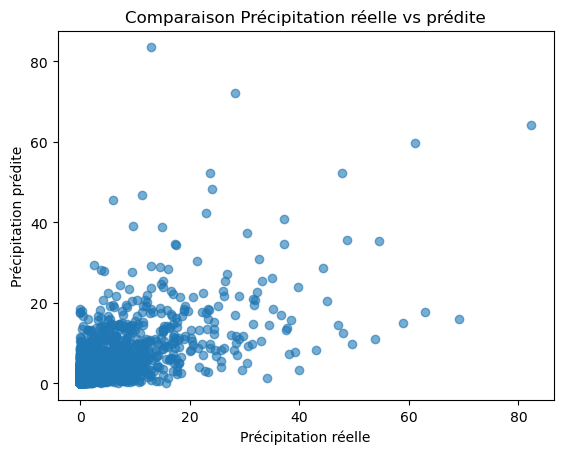

In [14]:
 #9️⃣ Visualiser la comparaison entre valeurs réelles et prédites
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Précipitation réelle")
plt.ylabel("Précipitation prédite")
plt.title("Comparaison Précipitation réelle vs prédite")
plt.show()

In [20]:
# 🔟 Exemple de prédiction sur une nouvelle observation
new_data = X.iloc[0:1]
predicted_precip = model.predict(new_data)
print(f"\nPrédiction de précipitation pour l’exemple : {predicted_precip[0]:.2f}")



Prédiction de précipitation pour l’exemple : 0.00


In [16]:
# 7️⃣ Créer et entraîner le modèle XGBoost
model1 = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [17]:
# 8️⃣ Évaluation du modèle
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n✅ RMSE : {rmse:.3f}")
print(f"✅ R² : {r2:.3f}")


✅ RMSE : 3.444
✅ R² : 0.449


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = d7[['temperature_2m_max', 'temperature_2m_min', 'relative_humidity_2m_max', 'departement']]
y = d7['precipitation_sum']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rain = RandomForestRegressor(n_estimators=100, random_state=42)
model_rain.fit(X_train, y_train)


ValueError: could not convert string to float: 'Bignona'